<a href="https://colab.research.google.com/github/ma850419/Flexible_Net/blob/main/new_unet_program_6June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate

#rom test_utils import summary, comparator

In [ ]:
!unzip /content/Samples/label_source_all.zip

In [12]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import imageio

import matplotlib.pyplot as plt
%matplotlib inline

path = ''
image_path = os.path.join(path, '/content/Source/')
mask_path = os.path.join(path, '/content/Label/')
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image_path+i for i in image_list]
mask_list = [mask_path+i for i in mask_list]

<ipython-input-14-1c3bf84b181c>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_list[N])
<ipython-input-14-1c3bf84b181c>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_list[N])


Text(0.5, 1.0, 'Segmentation')

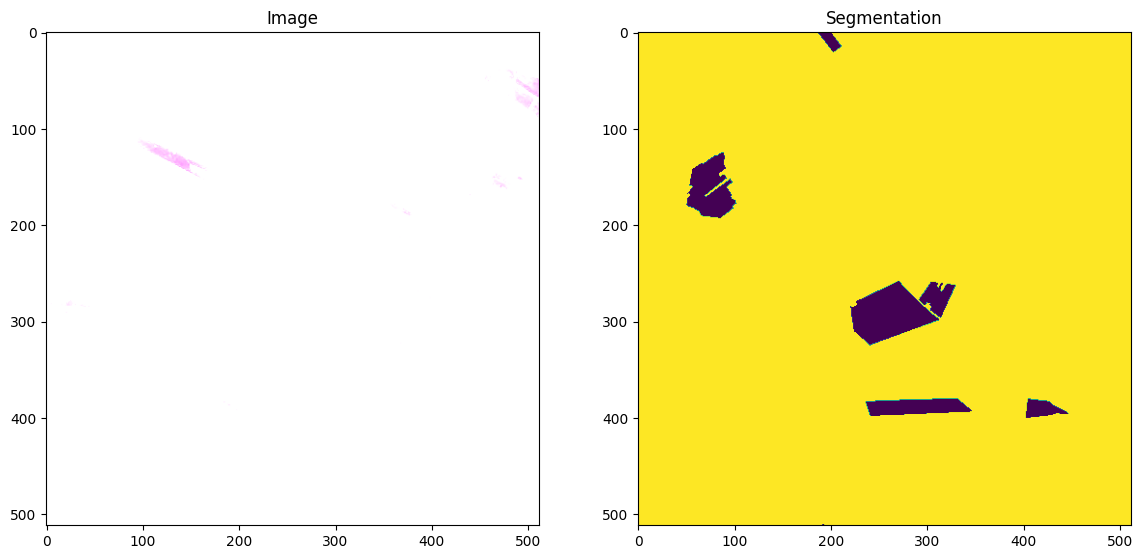

In [14]:
N = 2
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])
#mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask[:, :])
arr[1].set_title('Segmentation')

In [15]:
image_list_ds = tf.data.Dataset.list_files(image_list, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(mask_list, shuffle=False)

for path in zip(image_list_ds.take(3), mask_list_ds.take(3)):
    print(path)

(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Source/tile_0_0_0_2017-06-30.tif'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/Label/mask_tile_0_0_0_2017.tif'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Source/tile_0_0_0_2018-05-11.tif'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/Label/mask_tile_0_0_0_2018-05-16.tif'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Source/tile_0_0_0_2018-05-16.tif'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/Label/mask_tile_0_0_0_2018-05-21.tif'>)


In [17]:
image_filenames = tf.constant(image_list)
masks_filenames = tf.constant(mask_list)

dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

for image, mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'/content/Source/tile_1024_1536_13_2018-05-21.tif', shape=(), dtype=string)
tf.Tensor(b'/content/Label/mask_tile_0_512_1_2018-06-15.tif', shape=(), dtype=string)
